###### Show Notebook for Usage of sort_neigh.py

This jupyter notebook shows the core features of sort_neigh.py.

sort_neigh.py consists of a classifier (`sort_neigh.NeighbourClassifier`) and a surrounding class (`sort_neigh.NeighbourSort`) that handles reading the given nanoparticle and writing the results to according folders.
The key features can also be used in command line, some examples of how to do this are given below.

## Imports

Importing sort_neigh.py and time for timing the function calls.

In [1]:
import sys
sys.path.append("../py_src")

import sort_neigh
import time
import os
sorter = sort_neigh.NeighbourSort(
    rcut=5, nmax=12, lmax=12, sigma=2.5, gamma_kernel=1,
local_structures_path=os.path.abspath("../src/localstructures_newopt")
)

## Target Definition

Set the original nanoparticle over a given amount of timesteps in `nano_path`.
An output file for where to save the resulting counts per category for each timestep can be supplied in `save_txt_path`.
Initial configurations for the neighbour sorting algorithm are made here.

In [2]:
temperatures= ["400", "500", "600"]
for temp in temperatures:
    nano_path = "/Users/rhysbunting/Documents/felixprocess/rh/mc/" + temp + ".lammpstrj"
    save_txt_path = "/Users/rhysbunting/Documents/felixprocess/rh/mc/" + temp + ".txt"
    sorter = sort_neigh.NeighbourSort(
        rcut=5, nmax=12, lmax=12, sigma=2.5, gamma_kernel=1,
    local_structures_path=os.path.abspath("../src/localstructures_newopt_rh")
    )
    start = time.time()
    sorter.load_particle(
    nano_path
    )

    cat_counter = sorter.create_local_structure(
    last_n=15, create_subfolders=True,
    mode="pre_group"
    )
    stop = time.time()
    print("Sorting took %u seconds."%(stop-start))

    file_name = sorter.sort_save_cat(
    file_name=save_txt_path, cat_counter=cat_counter
    )

At Timestep:[########################################] 10000/10000
Sorting took 2652 seconds.
At Timestep:[########################################] 10000/10000
Sorting took 2266 seconds.
At Timestep:[########################################] 10000/10000
Sorting took 2255 seconds.


In [3]:
temperatures= ["400", "500", "600"]
for temp in temperatures:
    nano_path = "/Users/rhysbunting/Documents/felixprocess/rh/mcmd/" + temp + ".lammpstrj"
    save_txt_path = "/Users/rhysbunting/Documents/felixprocess/rh/mcmd/" + temp + ".txt"
    sorter = sort_neigh.NeighbourSort(
        rcut=5, nmax=12, lmax=12, sigma=2.5, gamma_kernel=1,
    local_structures_path=os.path.abspath("../src/localstructures_newopt_mcmd_rh")
    )
    start = time.time()
    sorter.load_particle(
    nano_path
    )

    cat_counter = sorter.create_local_structure(
    last_n=15, create_subfolders=True,
    mode="pre_group"
    )
    stop = time.time()
    print("Sorting took %u seconds."%(stop-start))

    file_name = sorter.sort_save_cat(
    file_name=save_txt_path, cat_counter=cat_counter
    )

At Timestep:[########################################] 10000/10000
Sorting took 1680 seconds.
At Timestep:[########################################] 10000/10000
Sorting took 1901 seconds.
At Timestep:[########################################] 10000/10000
Sorting took 2085 seconds.


In [6]:
temperatures= ["400", "500", "600"]
for temp in temperatures:
    nano_path = "/Users/rhysbunting/Documents/felixprocess/pd/mc/" + temp + ".lammpstrj"
    save_txt_path = "/Users/rhysbunting/Documents/felixprocess/pd/mc/" + temp + ".txt"
    sorter = sort_neigh.NeighbourSort(
        rcut=5, nmax=12, lmax=12, sigma=2.5, gamma_kernel=1,
    local_structures_path=os.path.abspath("../src/localstructures_newopt_pd")
    )
    start = time.time()
    sorter.load_particle(
    nano_path
    )

    cat_counter = sorter.create_local_structure(
    last_n=15, create_subfolders=True,
    mode="pre_group"
    )
    stop = time.time()
    print("Sorting took %u seconds."%(stop-start))

    file_name = sorter.sort_save_cat(
    file_name=save_txt_path, cat_counter=cat_counter
    )

At Timestep:[########################################] 10000/10000
Sorting took 2333 seconds.


In [3]:
temperatures= ["400", "500", "600"]
for temp in temperatures:
    nano_path = "/Users/rhysbunting/Documents/felixprocess/pd/mcmd/" + temp + ".lammpstrj"
    save_txt_path = "/Users/rhysbunting/Documents/felixprocess/pd/mcmd/" + temp + ".txt"
    sorter = sort_neigh.NeighbourSort(
        rcut=5, nmax=12, lmax=12, sigma=2.5, gamma_kernel=1,
    local_structures_path=os.path.abspath("../src/localstructures_newopt_mcmd_pd")
    )
    start = time.time()
    sorter.load_particle(
    nano_path
    )

    cat_counter = sorter.create_local_structure(
    last_n=15, create_subfolders=True,
    mode="pre_group"
    )
    stop = time.time()
    print("Sorting took %u seconds."%(stop-start))

    file_name = sorter.sort_save_cat(
    file_name=save_txt_path, cat_counter=cat_counter
    )

At Timestep:[########################################] 10000/10000
Sorting took 34360 seconds.
At Timestep:[########################################] 10000/10000
Sorting took 1593 seconds.
At Timestep:[########################################] 10000/10000
Sorting took 1901 seconds.


## Running the sorting algorithm

`NeighbourSort.init_folder_structure` creates one subdirectory in `out_dir` for each timestep in `nano_path`.
Each subdirectory contains the nanoparticle at the given timestep as a .lammpstrj file.

WARNING: `n_atoms_in_part` (number of atoms in nanoparticle) and `timesteps` (number of timesteps in `nano_path`) need to be set correctly for `NeighbourSort` to work. 

Running `NeighbourSort.create_local_structure` calculates the number of particles in a given configuration and saves it as a numpy array.
Depending on `mode` the atoms are either pre-filtered by their number of neighbours ("pre_group") or compared to the full kernel ("class_all").
If the `create_subfolders` flag is set, each timestep directory is filled with directories containing the nearest neighbours structures of the atom.

`NeighbourSort.sort_save_cat` is used to sort and save a category counter for the current configuration of variables in `NeighbourSort`.

The following command line arguments perform the same functionalities when run from the surface_class directory:

"`sort_neigh_terminal.py sort_cat test_data/cunano_show.lammpstrj -o test_data/sort_neigh_results/ -O test_data/show_analysis.txt`"

"`sort_neigh_terminal.py sort_cat test_data/cunano_show.lammpstrj -o test_data/sort_neigh_results/ -O test_data/show_analysis.txt --r_cut 0.1 --create_subfolders 0 --classify_mode class_all`"

In [2]:
#start = time.time()
#sorter.init_folder_structure(
#    nano_path, n_atoms_in_part=1577, timesteps=None, out_dir="../test_data/sort_neigh_results/"
#)
#
#cat_counter = sorter.create_local_structure(
#    last_n=15, create_subfolders=True,
#    mode="pre_group"
#)
#stop = time.time()
#print("Sorting took %u seconds."%(stop-start))
#
#file_name = sorter.sort_save_cat(
#    file_name=save_txt_path, cat_counter=cat_counter
#)

## Plotting Results

`NeighbourSort` contains a handy function for plotting pre-existing results called `NeighbourSort.plot_dist`.
Here, a previously saved category counter is loaded via `NeighbourSort.load_sort_cat` and plotted.

The following command line arguments perform the same functionalities when run from the surface_class directory:

"`sort_neigh_terminal.py plot_result test_data/show_analysis.txt`"

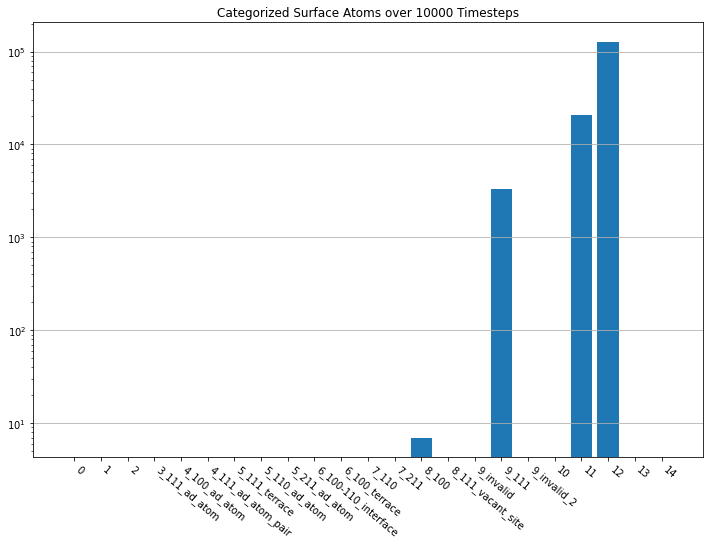

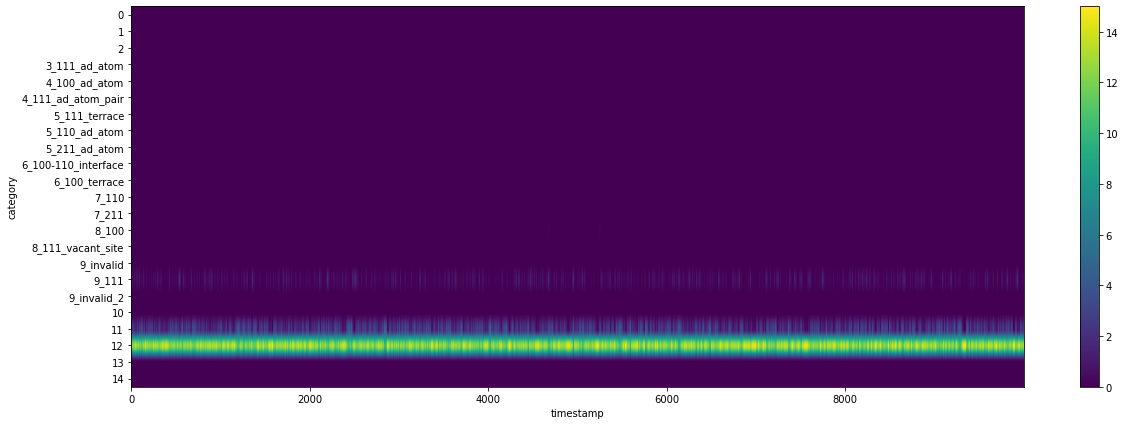

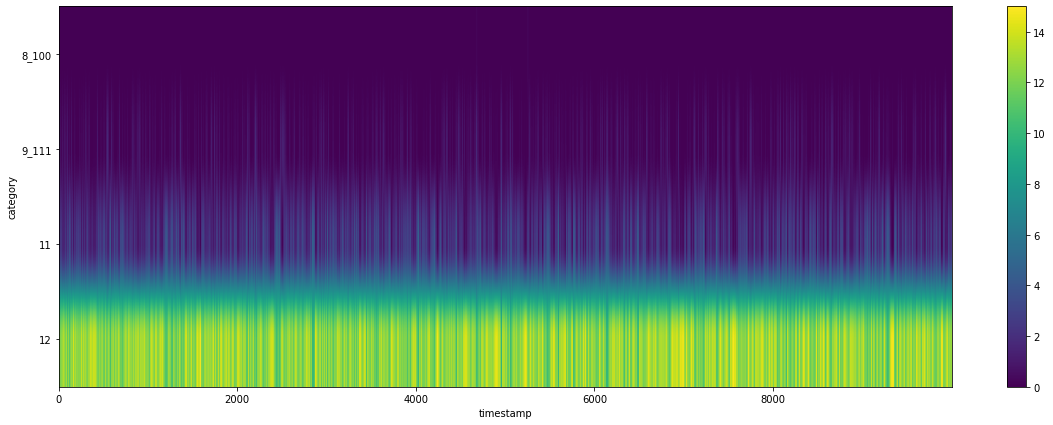

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      7      0      0   3332      0      0  20587
 126074      0      0]


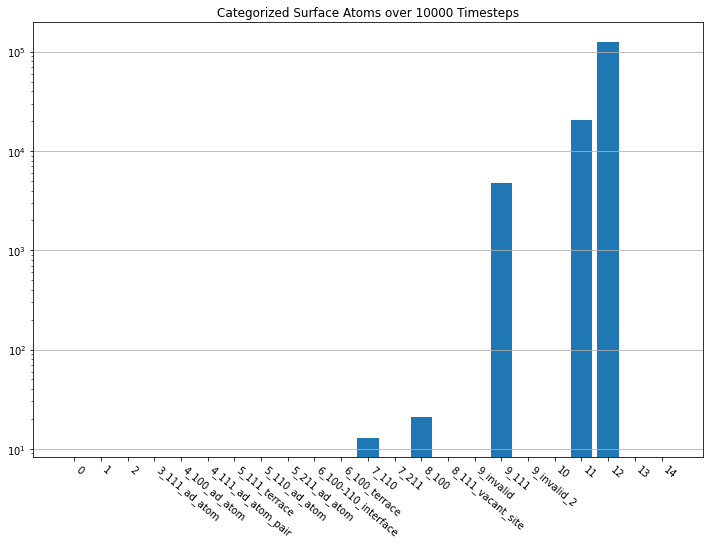

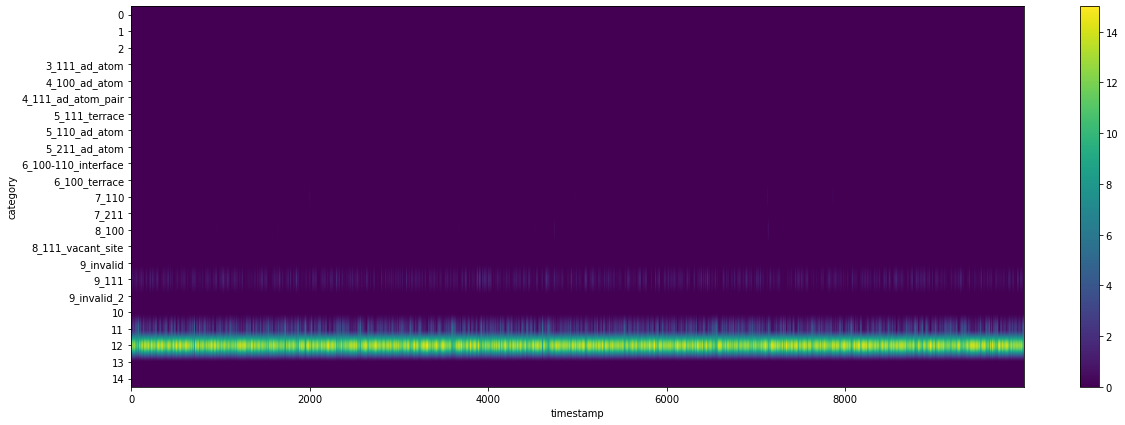

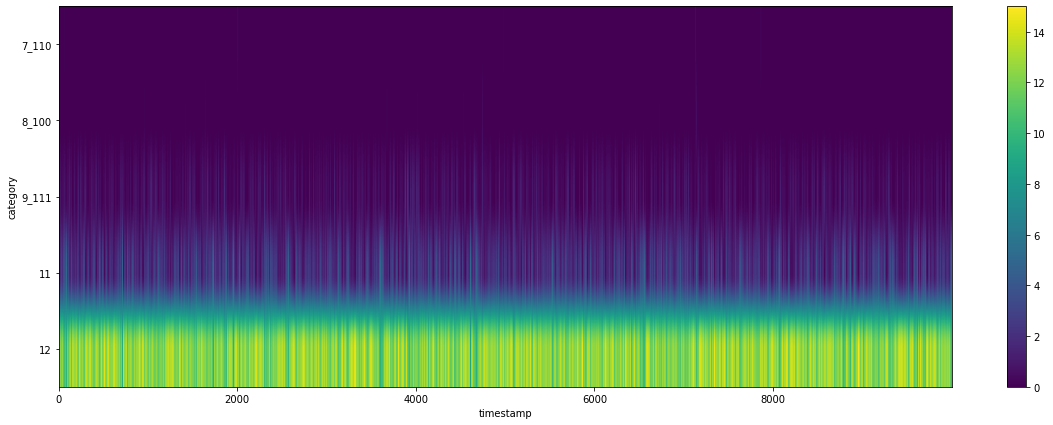

[     0      0      0      0      0      0      0      0      0      0
      0     13      0     21      0      0   4764      0      0  20528
 124674      0      0]


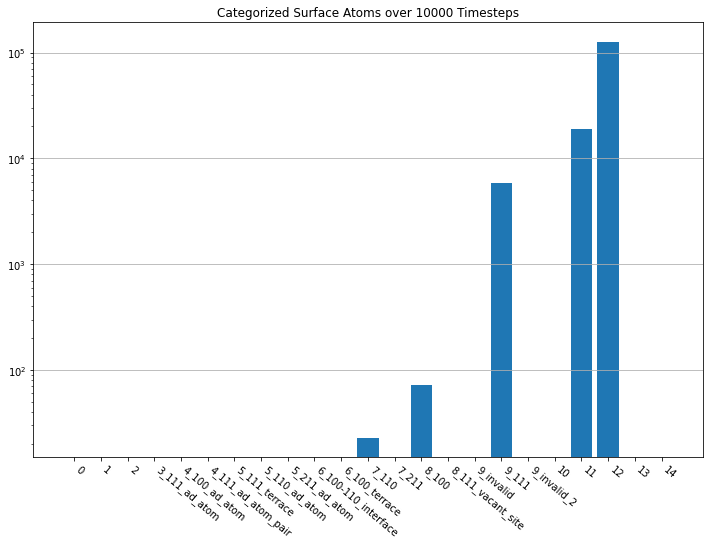

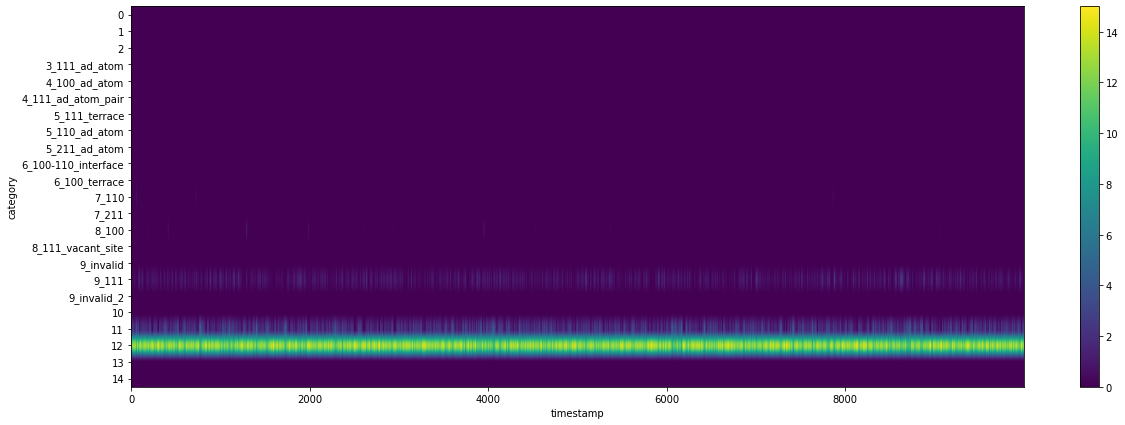

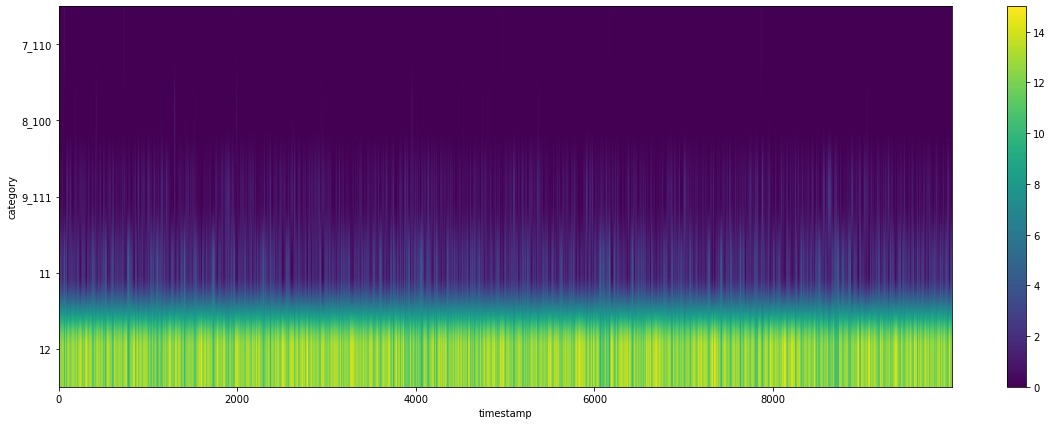

[     0      0      0      0      0      0      0      0      0      0
      0     23      0     72      0      0   5901      0      0  18887
 125117      0      0]


In [10]:
import numpy as np

temperatures= ["400", "500", "600"]
for temp in temperatures:
    sorted_cat_counter, timesteps, sorted_classes = sorter.load_sort_cat(file_name="/Users/rhysbunting/Documents/felixprocess/rh/mc/" + temp + ".txt" )
    sorter.plot_dist(sorted_classes, sorted_cat_counter)
    #print('0 1 2 3_111adatom 4_100adatom 4_111adatompair 5_111terrace 5_110adatom 5_211adatom 6_100_110interface 6_100terrace 7_110 7_211 8_100 8_111vacantsite 9_invalid 9_111 9_invalid2 10 11 12 13 14')
    print(np.sum(sorted_cat_counter, axis=0))

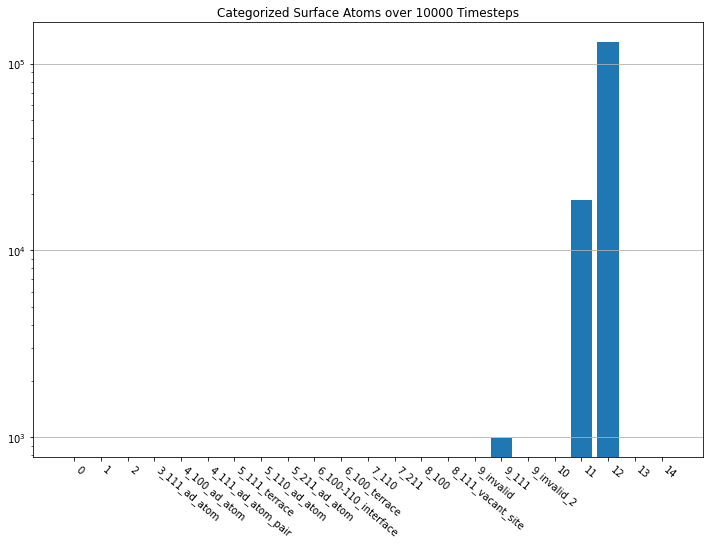

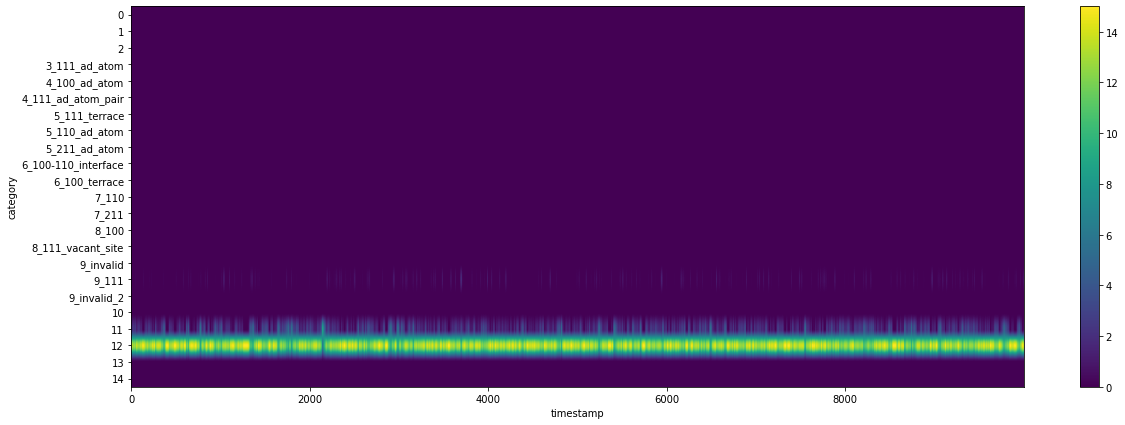

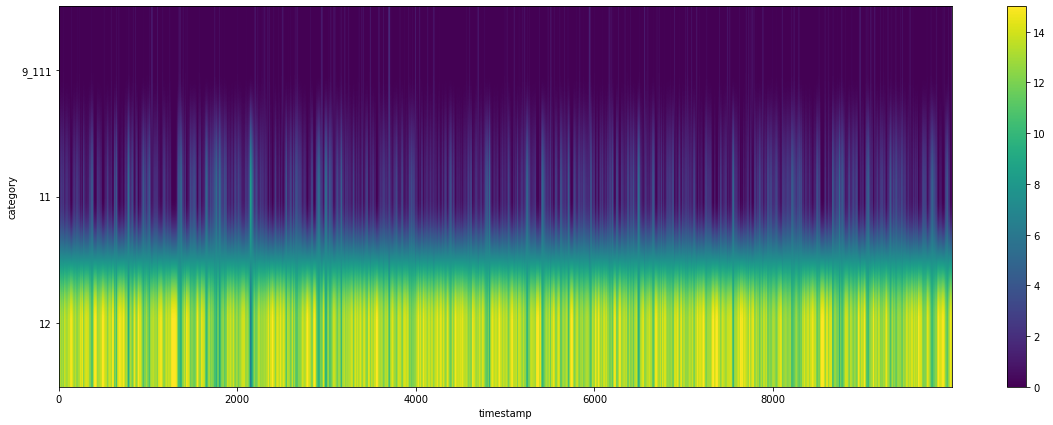

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0    994      0      0  18640
 130366      0      0]


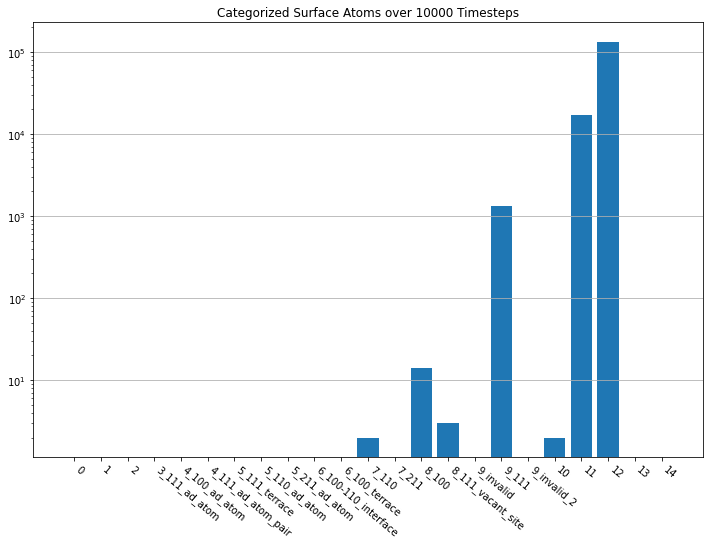

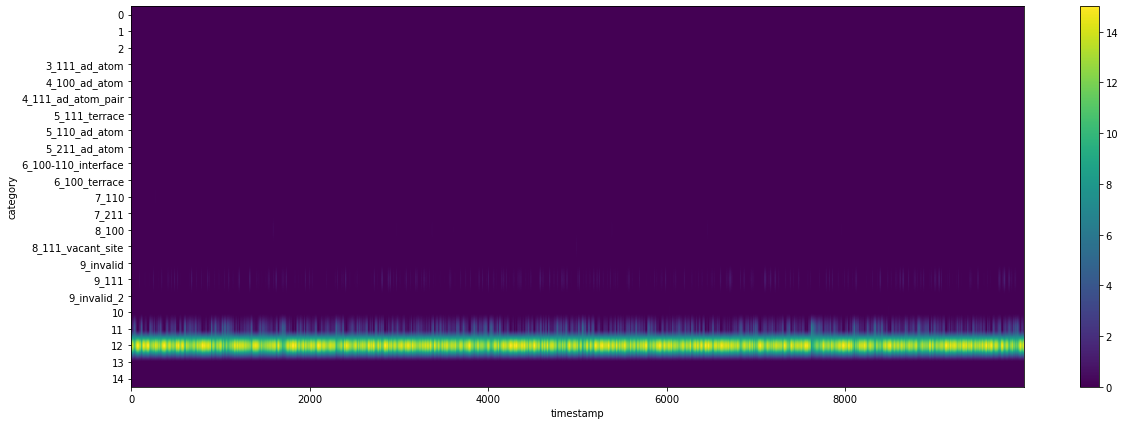

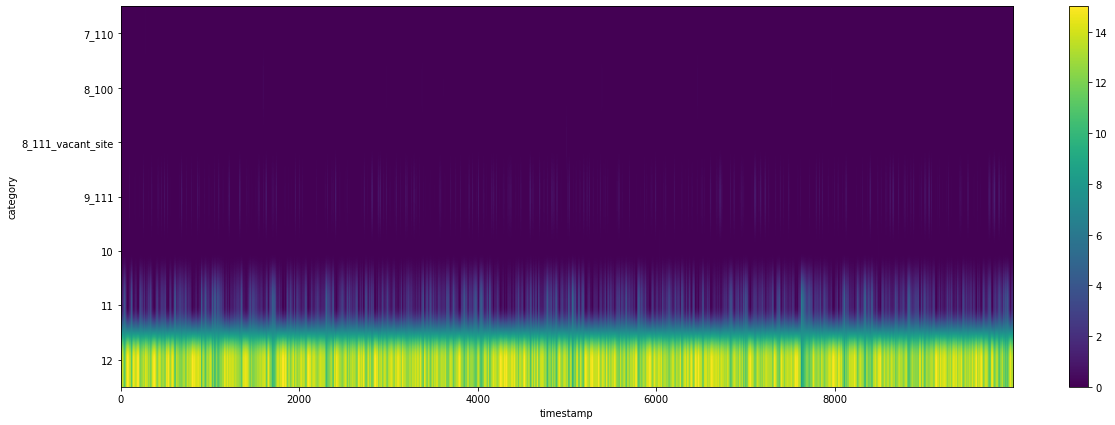

[     0      0      0      0      0      0      0      0      0      0
      0      2      0     14      3      0   1323      0      2  17154
 131502      0      0]


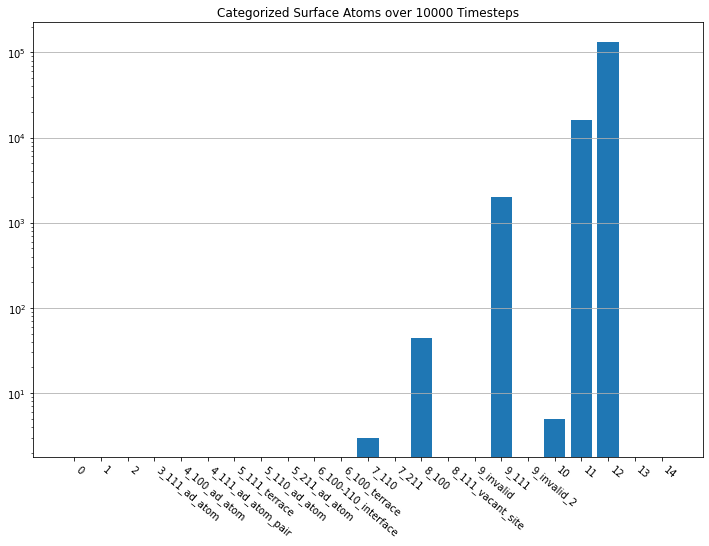

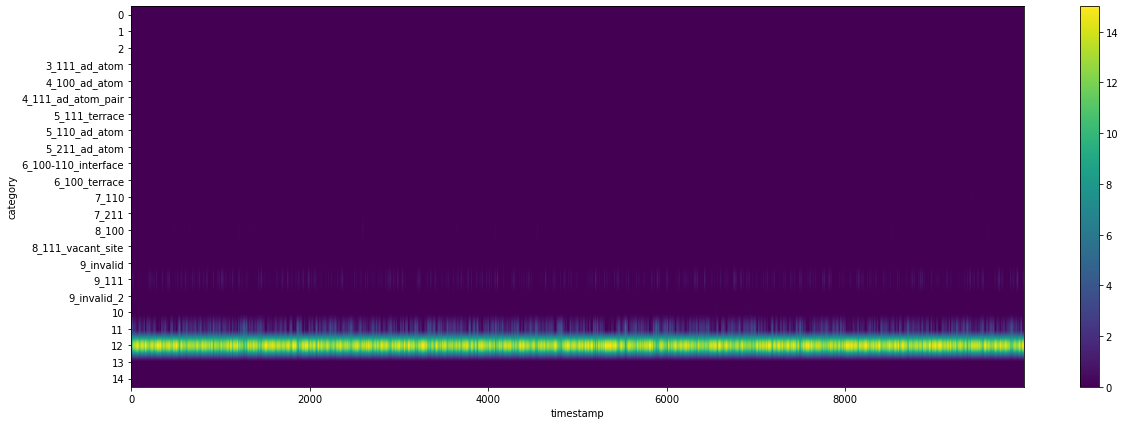

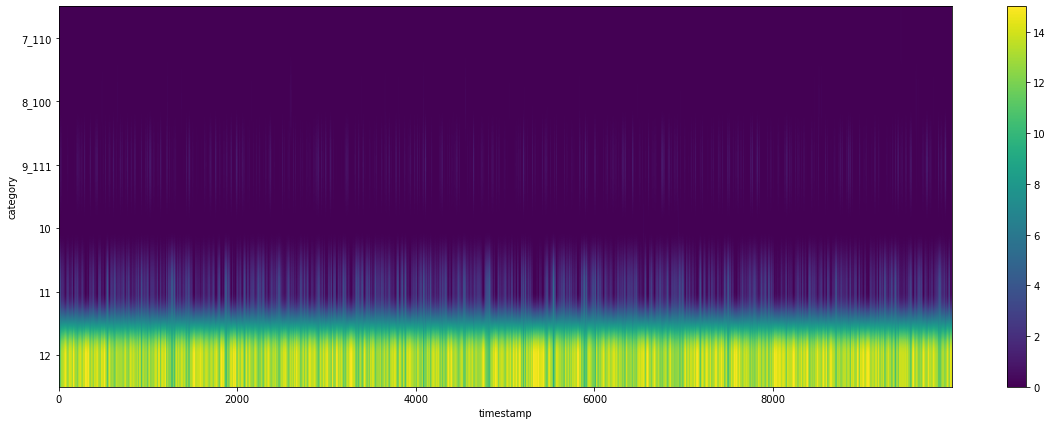

[     0      0      0      0      0      0      0      0      0      0
      0      3      0     44      0      0   1998      0      5  15960
 131990      0      0]


In [11]:
import numpy as np

temperatures= ["400", "500", "600"]
for temp in temperatures:
    sorted_cat_counter, timesteps, sorted_classes = sorter.load_sort_cat(file_name="/Users/rhysbunting/Documents/felixprocess/rh/mcmd/" + temp + ".txt" )
    sorter.plot_dist(sorted_classes, sorted_cat_counter)
    #print('0 1 2 3_111adatom 4_100adatom 4_111adatompair 5_111terrace 5_110adatom 5_211adatom 6_100_110interface 6_100terrace 7_110 7_211 8_100 8_111vacantsite 9_invalid 9_111 9_invalid2 10 11 12 13 14')
    print(np.sum(sorted_cat_counter, axis=0))

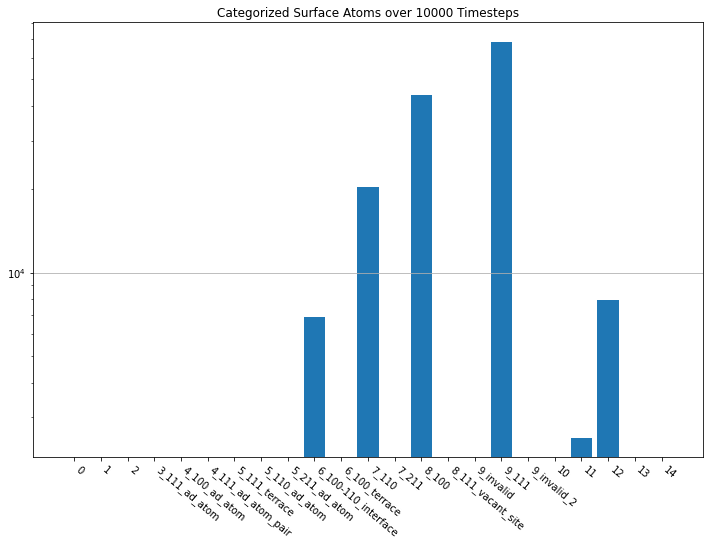

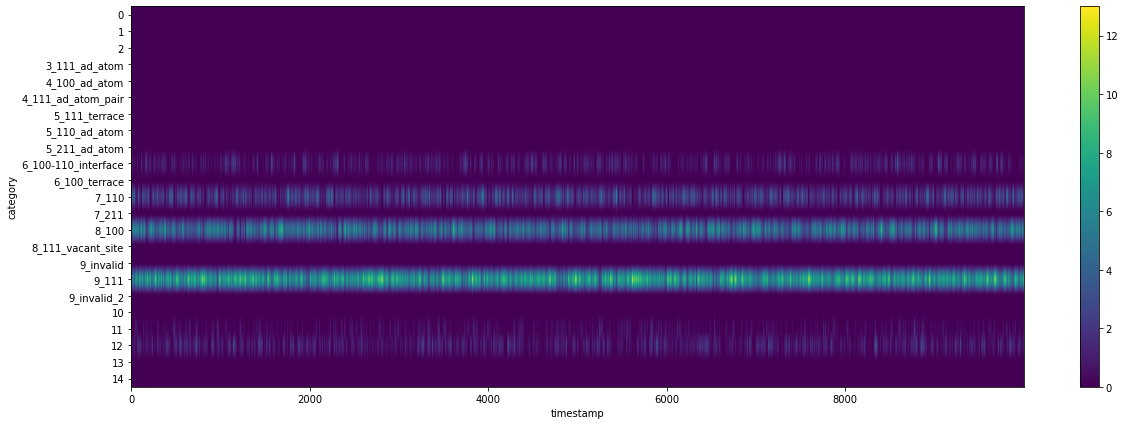

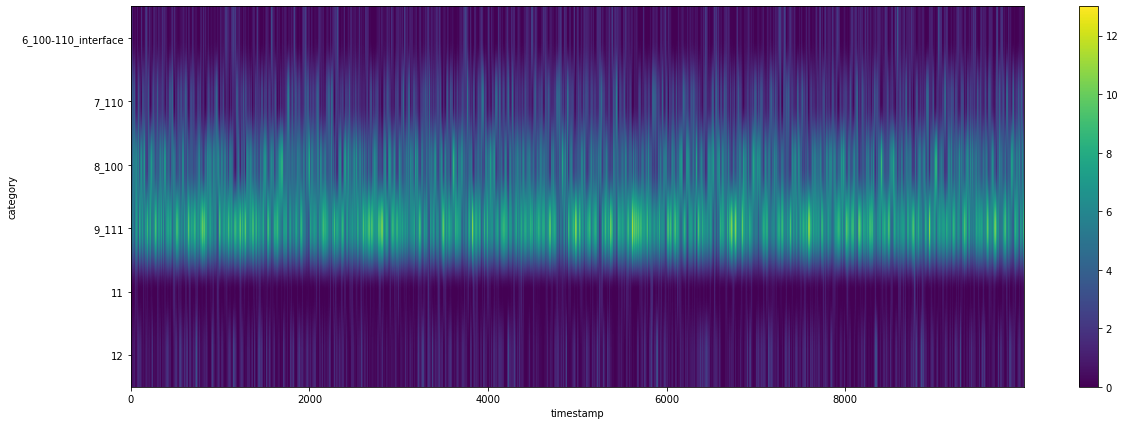

[    0     0     0     0     0     0     0     0     0  6899     0 20395
     0 43983     0     0 68210     0     0  2529  7984     0     0]


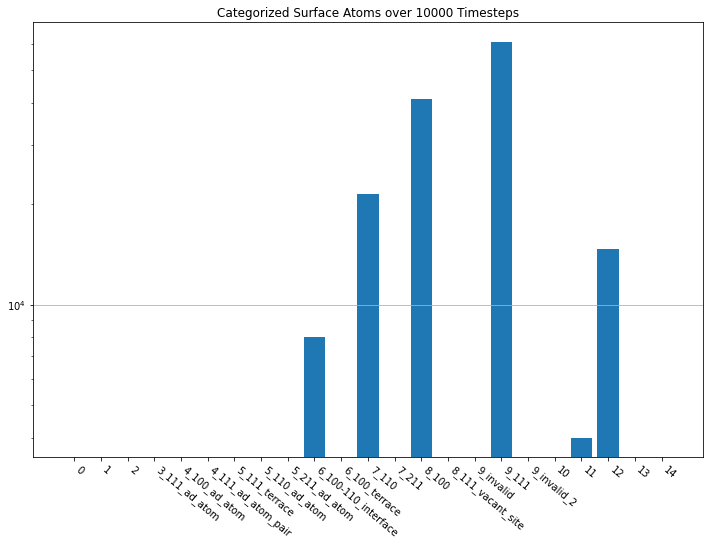

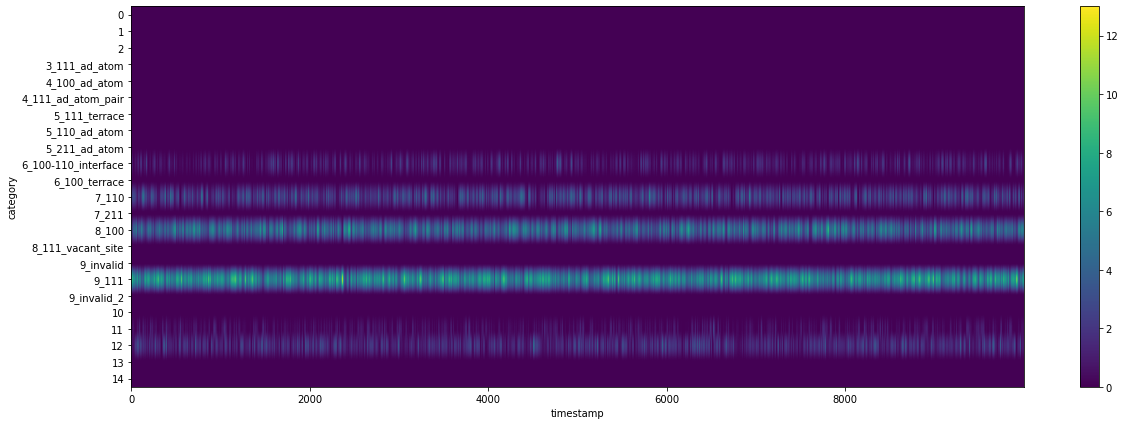

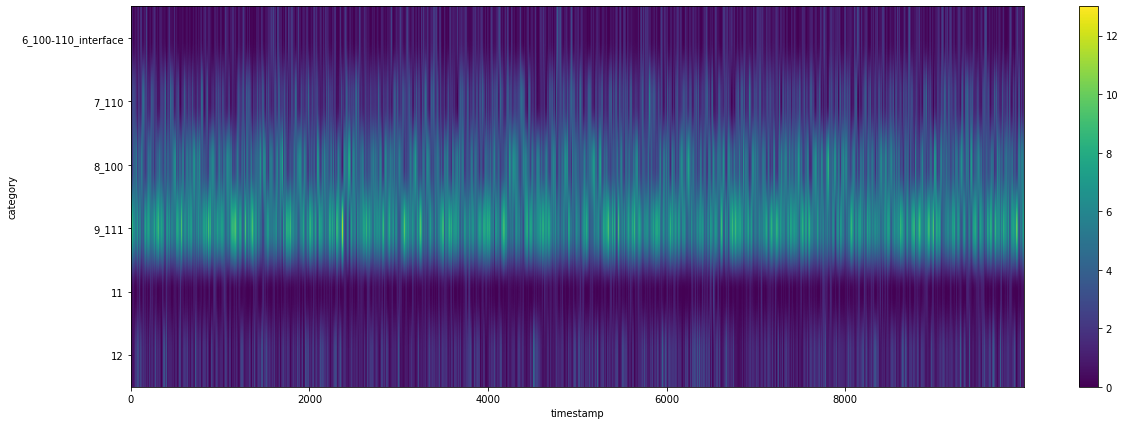

[    0     0     0     0     0     0     0     0     0  8009     0 21375
     0 41212     0     0 60700     0     0  4009 14695     0     0]


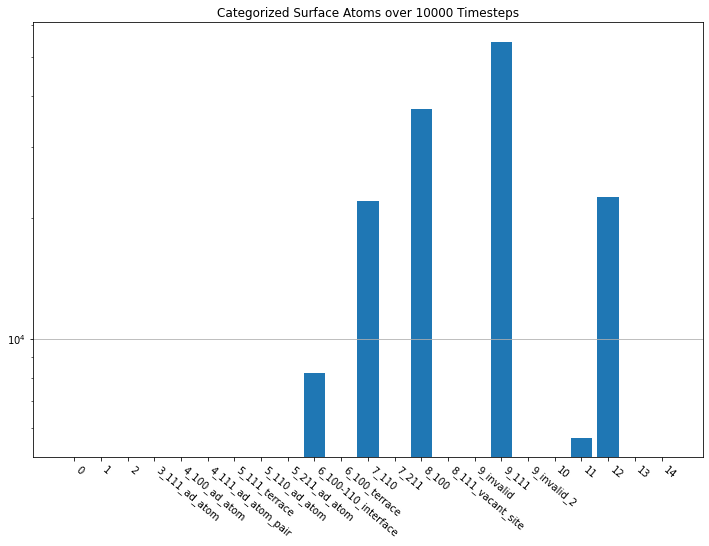

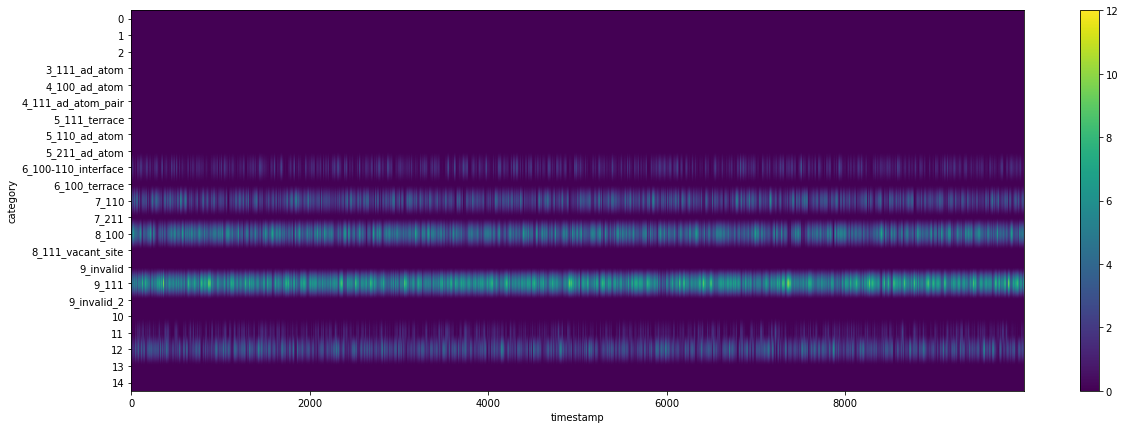

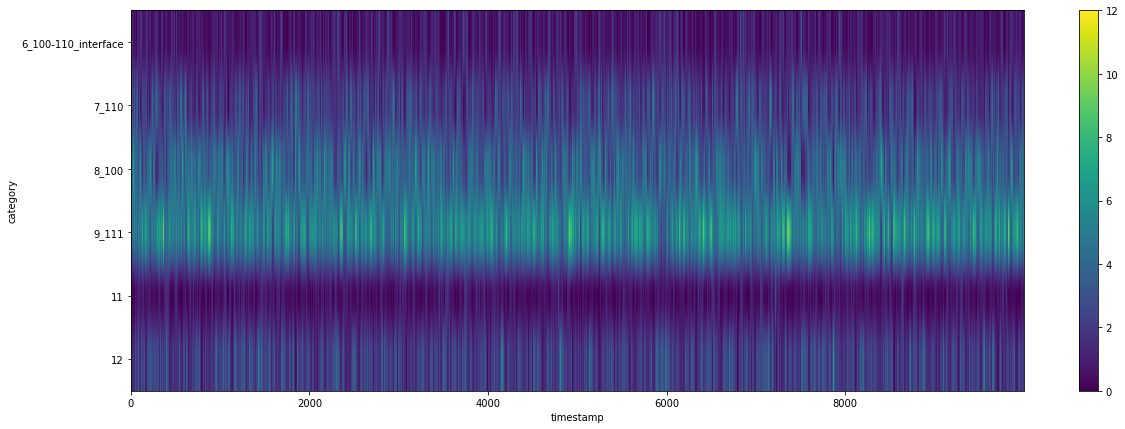

[    0     0     0     0     0     0     0     0     0  8236     0 22028
     0 37131     0     0 54456     0     0  5689 22460     0     0]


In [12]:
import numpy as np

temperatures= ["400", "500", "600"]
for temp in temperatures:
    sorted_cat_counter, timesteps, sorted_classes = sorter.load_sort_cat(file_name="/Users/rhysbunting/Documents/felixprocess/pd/mc/" + temp + ".txt" )
    sorter.plot_dist(sorted_classes, sorted_cat_counter)
    #print('0 1 2 3_111adatom 4_100adatom 4_111adatompair 5_111terrace 5_110adatom 5_211adatom 6_100_110interface 6_100terrace 7_110 7_211 8_100 8_111vacantsite 9_invalid 9_111 9_invalid2 10 11 12 13 14')
    print(np.sum(sorted_cat_counter, axis=0))

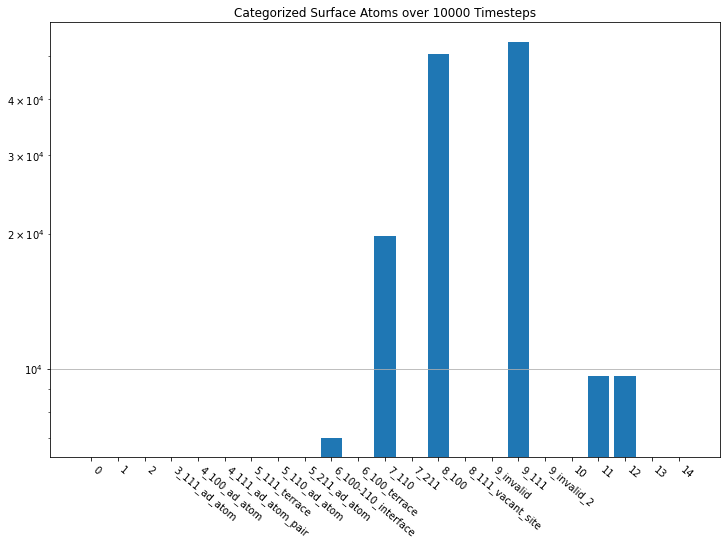

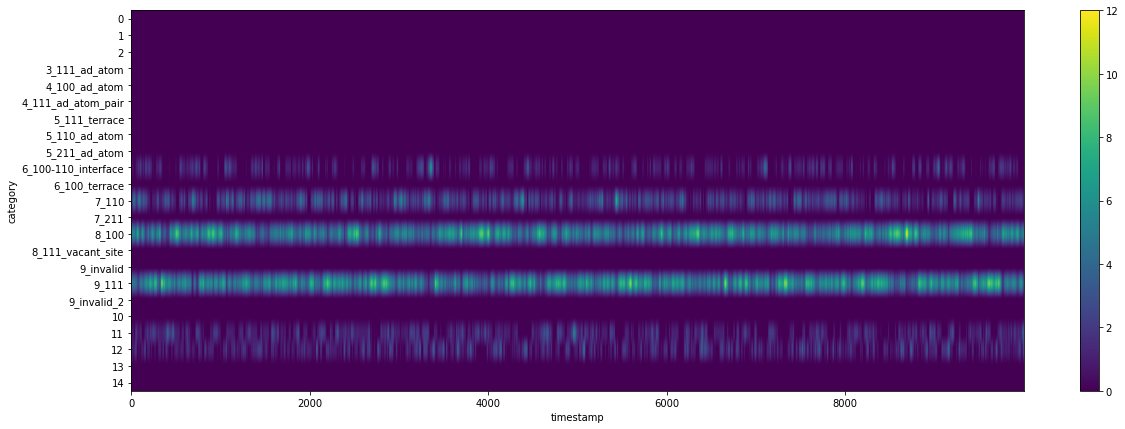

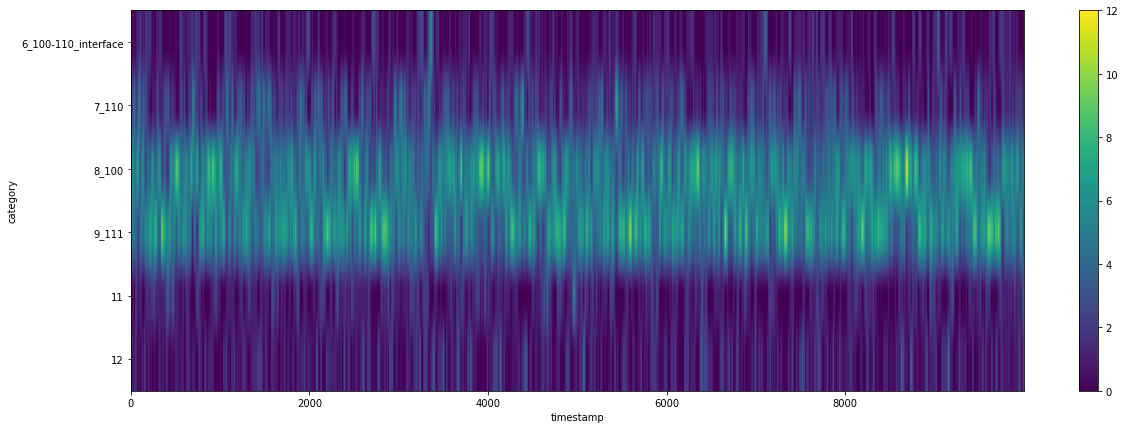

[    0     0     0     0     0     0     0     0     0  7015     0 19752
     0 50424     0     0 53551     0     0  9614  9644     0     0]


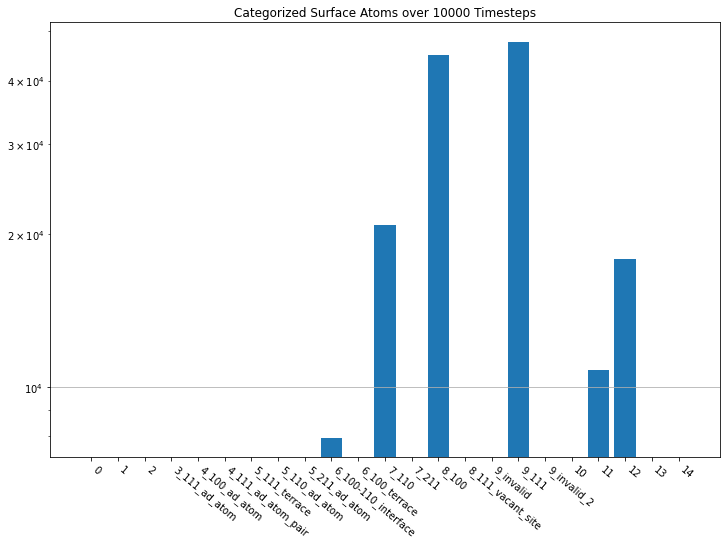

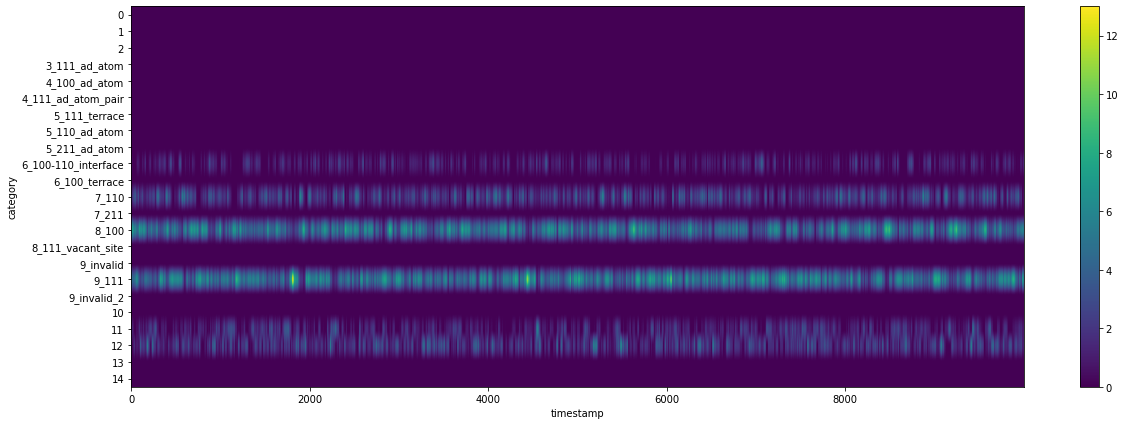

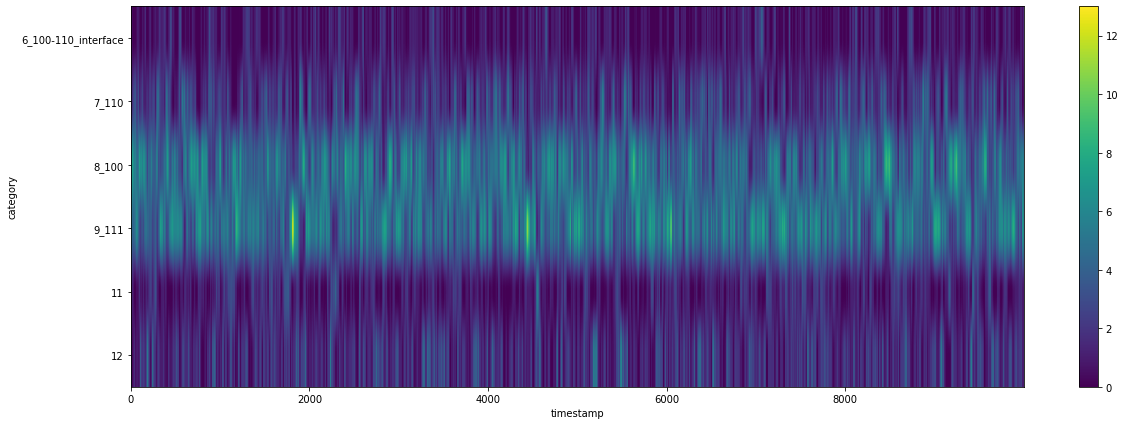

[    0     0     0     0     0     0     0     0     0  7960     0 20841
     0 44969     0     0 47612     0     0 10785 17833     0     0]


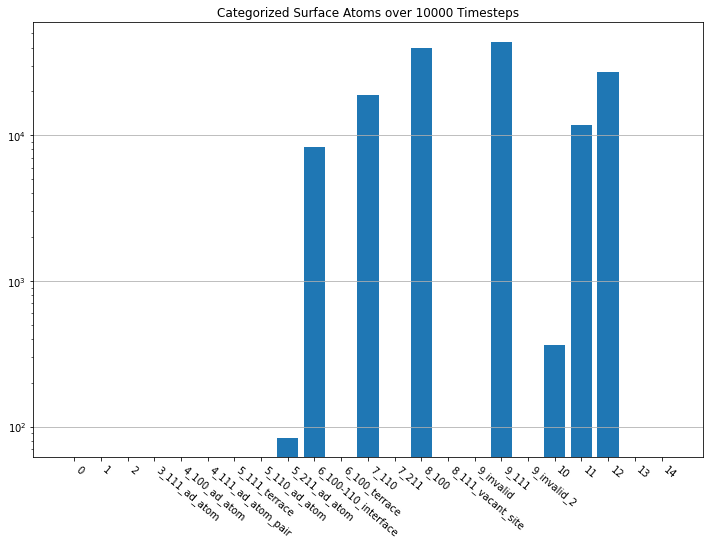

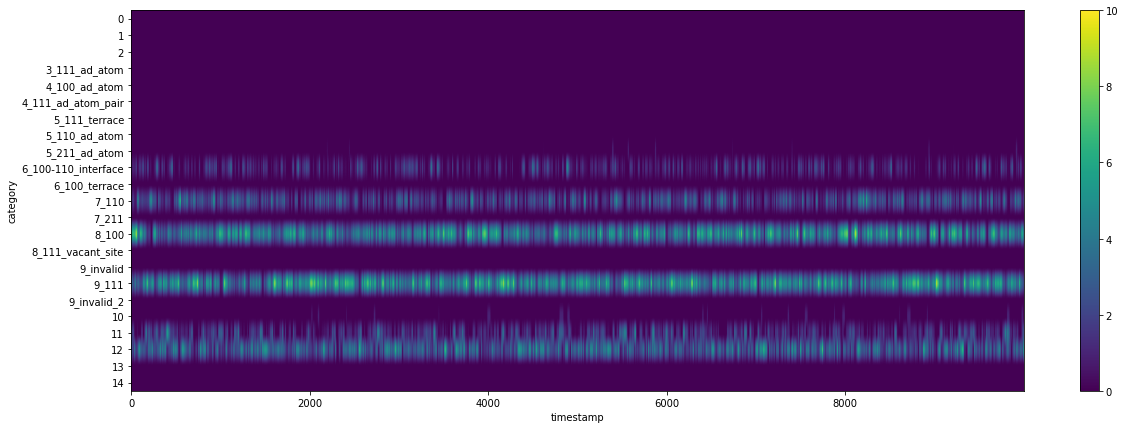

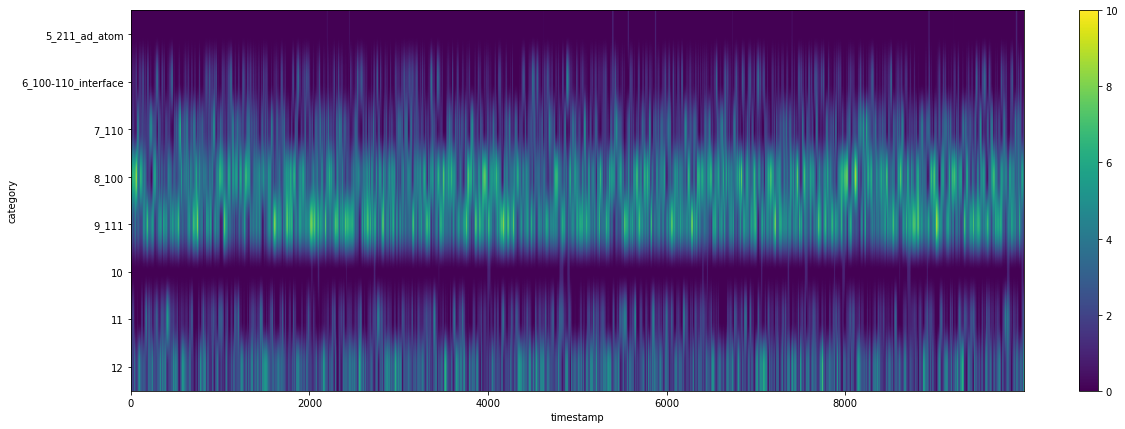

[    0     0     0     0     0     0     0     0    84  8248     0 18973
     0 39731     0     0 43509     0   365 11726 27364     0     0]


In [13]:
import numpy as np

temperatures= ["400", "500", "600"]
for temp in temperatures:
    sorted_cat_counter, timesteps, sorted_classes = sorter.load_sort_cat(file_name="/Users/rhysbunting/Documents/felixprocess/pd/mcmd/" + temp + ".txt" )
    sorter.plot_dist(sorted_classes, sorted_cat_counter)
    #print('0 1 2 3_111adatom 4_100adatom 4_111adatompair 5_111terrace 5_110adatom 5_211adatom 6_100_110interface 6_100terrace 7_110 7_211 8_100 8_111vacantsite 9_invalid 9_111 9_invalid2 10 11 12 13 14')
    print(np.sum(sorted_cat_counter, axis=0))